## Retail Banking Campaign Analysis
 
 Completed by: Atoosa Rashid  
 [LinkedIn](https://www.linkedin.com/in/atoosarashid/) | [GitHub](https://github.com/atoosa-r)  

 January 2025  
____


### Table of Contents
- [Part 1: Statistical Summary and Initial Exploratory Data Analysis](#part-1-statistical-summary-and-initial-exploratory-data-analysis)
  - [Demographic Attributes](#Demographic-Attributes)
  - [Campaign Attributes](#Campaign-Attributes)
  - [Economic Attributes](#Economic-Attributes)
  - [Data Cleaning and Rationale](#Data-Cleaning-and-Rationale)
  - [Detailed Python Code](#Detailed-Python-Code)


- [Part 2: Report and Visualizations on Key Performance Indicators (KPIs)](#part-2-report-and-visualizations-on-key-performance-indicators-kpis)
  - [Customer Segment Profitability](#Customer-Segment-Profitability)
  - [Customer Segment Risk](#Customer-Segment-Risk)
  - [Campaign Response Rate](#Campaign-Response-Rate)

**Note:** This notebook is designed to run on a Python 3.8+ environment with `pandas`, `numpy`, `matplotlib`, and `seaborn` installed.

---

## Part 1: Statistical Summary and Initial Exploratory Data Analysis

### Overview of the Dataset
The dataset represents the marketing campaign results of a Portuguese banking institution. Key components include:
1. **Client Demographics**: Attributes such as age, job, marital status, and education.
2. **Campaign Details**: Information like contact type, campaign duration, and previous interactions.
3. **Economic Context**: Features such as employment variation rate and consumer confidence index.
4. **Objective**: Predict whether a client subscribes to a term deposit (binary classification).
---

### Demographic Attributes
- **Age**:
  - **Range**: 18 to 95
  - **Mean**: 40.0
  - **Observation**: Outliers exist for ages above 90.
- **Job**:
  - **Unique Professions**: 12 (e.g., admin., technician, blue-collar)
  - **Missing/NaN**: 330 records (~0.8%)
- **Marital Status**:
  - **Categories**: Married, single, divorced
  - **Missing/NaN**: 80 records (~0.2%)
- **Education**:
  - **Categories**: Basic (4y/6y/9y), high school, university
  - **Missing/NaN**: 1,731 records (~4.2%)
- **Default**:
  - **Indicator**: Denotes credit default status
  - **Missing/NaN**: 8,597 records (~20.8%). High proportion of missing values suggests limited predictive power.
- **Housing Loan**:
  - **Categories**: Yes, No
  - **Missing Values**: None
- **Personal Loan**:
  - **Categories**: Yes, No
  - **Missing Values**: None

### Campaign Attributes
- **Contact**:
  - **Types**: Cellular (63.5%) and telephone (36.5%)
  - **Missing Values**: None
- **Month**:
  - **Peak Activity**: May (33.4% of all contacts)
  - **Observation**: Seasonal trends should be analyzed.
- **Day of Week**:
  - **Highest Contact**: Thursday
- **Campaign Count**:
  - **Median**: 2
  - **Maximum**: 56 (Potential outliers, indicating excessive contacts with some clients).
- **Pdays**:
  - **Observation**: Value 999 dominates (~96%), indicating no prior contact. Should be treated as categorical.
- **Previous Contacts**:
  - **Observation**: Majority of clients have zero previous contacts.
- **Poutcome**:
  - **Categories**: 'Nonexistent' (~91%), indicating no prior outcome.

### Economic Attributes
- **Employment Variation Rate**:
  - **Average**: 1.1
  - **Observation**: Indicates stable employment conditions.
- **Consumer Price Index**:
  - **Average**: 93.9
- **Consumer Confidence Index**:
  - **Trend**: Negative (~-40), reflecting low consumer confidence.
- **3-Month Euribor Rate**:
  - **Observation**: Stable (~4.85)
- **Number of Employees**:
  - **Consistent**: ~5,191 employees, signaling stable employment conditions.

---

### Data Cleaning and Rationale

#### 1. Duplicates
- **Observation**: Duplicate records were identified but not yet removed, as repeated client interactions in banking may represent valid data. Whether to remove duplicates depends on the analysis context. If each row represents a unique interaction, duplicates could inflate metrics and misrepresent behavior, making removal necessary. However, if they reflect intentional repeated interactions, they should be retained. Before proceeding, we’ll confirm their origin and relevance. If unnecessary, we can clean the dataset using drop_duplicates() for accurate analysis.
- **Recommendation**: Further analysis into the duplicate nature of these records is recommended.
#### 2. Unknown to NaN
- **Action Taken**: All "unknown" values were replaced with `NaN`, aligning with standard practices for handling missing data.
#### 3. Missing Values
- Features like `education` and `default` have high missing rates.
- **Recommendation**: Treatment depends on their importance to predictive analysis.
#### 4. Data Preparation
- `object` to `category` (for more efficient memory usage and faster computation): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y
- For `pdays`, could consider handling 999 as a special value
____

### Detailed Python Code

In [4]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       
import seaborn as sns 

In [5]:
# Loading the dataset

file_path = '/bankdata.csv'
bank_data = pd.read_csv(file_path, delimiter=';')

In [6]:
# Sanity Check 

bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Dataset overview

print(f"There are {bank_data.shape[0]} rows and {bank_data.shape[1]} columns.")


There are 41189 rows and 21 columns.


In [8]:
# Display adjustment to view all columns

pd.set_option('display.max_columns', None)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
# Displaying data types of all columns

print(bank_data.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


**Notes:**
The following datatypes could be changed:
- `object` to `category` (for more efficient memory usage and faster computation): job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y
- For `pdays`, could consider handling 999 as a special value

In [10]:
# Selecting only categorical columns (dtype is 'object'):

categorical_columns = bank_data.select_dtypes(include=['object']).columns

# Looping through these columns and printing unique values:

for column in categorical_columns:
    unique_values = bank_data[column].unique()
    print(f"Column: {column} \n")
    print(f"Unique Values ({len(unique_values)}): {unique_values} \n")
    print("-" * 100)

Column: job 

Unique Values (12): ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

----------------------------------------------------------------------------------------------------
Column: marital 

Unique Values (4): ['married' 'single' 'divorced' 'unknown'] 

----------------------------------------------------------------------------------------------------
Column: education 

Unique Values (8): ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

----------------------------------------------------------------------------------------------------
Column: default 

Unique Values (3): ['no' 'unknown' 'yes'] 

----------------------------------------------------------------------------------------------------
Column: housing 

Unique Values (3): ['no' 'yes' 'unknown'] 

-------------------------------------------------

In [11]:
# Replacing 'unknown' with NaN

bank_data_nan = bank_data.replace('unknown', np.nan)

#Sanity Checks

print(f"Occurrences of 'unknown' before: {(bank_data == 'unknown').sum().sum()}")
print(f"Occurrences of NaN after: {bank_data_nan.isna().sum().sum()}")


Occurrences of 'unknown' before: 12718
Occurrences of NaN after: 12718


In [12]:
# One more sanity check for good measure

bank_data_nan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
# Checking for duplicates

print(f'Duplicated rows: {bank_data_nan.duplicated().any()}')


Duplicated columns: False
Duplicated rows: True


In [14]:
# Checking for duplicate rows

duplicated_rows = bank_data_nan[bank_data_nan.duplicated(keep=False)]
print(f"Total rows flagged as duplicates: {len(duplicated_rows)}")


Total rows flagged as duplicates: 26


In [15]:
# Reviewing the individual duplicated rows

duplicated_rows


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1267,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12262,36,retired,married,NaN,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14156,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14235,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16820,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16957,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


**Note**
- The analysis of duplicated rows revealed several occurrences of identical data entries. These duplicates could be a result of data entry errors, repeated records, or other inconsistencies in the data collection process. Removing these duplicates depends on the context of our analysis.
- If each row represents a unique client interaction, duplicates may inflate metrics and misrepresent customer behavior, so removing them would be the best course of action. However, if duplicates reflect intentional repeated interactions or hold relevance to the analysis, they should be retained.
- Before deleting, we'll need to confirm the origin and relevance of duplicates. If unnecessary, we can use drop_duplicates() to clean the dataset for accurate analysis.

In [16]:
# Summarizing all missing values found in the columns

missing_values_summary = bank_data_nan.isnull().sum()

print("\n Missing Values Summary Report")
print("-------------------------------")
print(missing_values_summary)


 Missing Values Summary Report
-------------------------------
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [17]:
# Initial Observations

print("\n-------------- Initial Observations --------------\n")
print("1. Most common job:", bank_data_nan['job'].mode()[0])
print("2. Most common marital status:", bank_data_nan['marital'].mode()[0])
print("3. Most common education level:", bank_data_nan['education'].mode()[0])
print("4. Most used contact method:", bank_data_nan['contact'].mode()[0])
print("\n--------------------------------------------------")


-------------- Initial Observations --------------

1. Most common job: admin.
2. Most common marital status: married
3. Most common education level: university.degree
4. Most used contact method: cellular

--------------------------------------------------


In [18]:
# Outlining the descriptive statistic columns

demographic_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
campaign_columns = ['contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome']
economic_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Generating the statistics for each 

demographic_stats = bank_data_nan[demographic_columns].describe(include='all').transpose()
campaign_stats = bank_data_nan[campaign_columns].describe(include='all').transpose()
economic_stats = bank_data_nan[economic_columns].describe().transpose()

In [19]:
# Full display of demographic descriptive statistics

print("\n----------------------- Demographic Statistics Summary ----------------------- \n")
print(demographic_stats, "\n")


----------------------- Demographic Statistics Summary ----------------------- 

             count unique                top   freq       mean        std  \
age        41189.0    NaN                NaN    NaN  40.023938  10.421153   
job          40859     11             admin.  10422        NaN        NaN   
marital      41109      3            married  24929        NaN        NaN   
education    39458      7  university.degree  12168        NaN        NaN   
default      32592      2                 no  32589        NaN        NaN   
housing      40199      2                yes  21577        NaN        NaN   
loan         40199      2                 no  33951        NaN        NaN   

            min   25%   50%   75%   max  
age        17.0  32.0  38.0  47.0  98.0  
job         NaN   NaN   NaN   NaN   NaN  
marital     NaN   NaN   NaN   NaN   NaN  
education   NaN   NaN   NaN   NaN   NaN  
default     NaN   NaN   NaN   NaN   NaN  
housing     NaN   NaN   NaN   NaN   NaN  
loan   

In [20]:
# Full display of campaign descriptive statistics

print("\n-------------------------- Campaign Statistics Summary -------------------------- \n")
print(campaign_stats, "\n")



-------------------------- Campaign Statistics Summary -------------------------- 

               count unique          top   freq        mean         std  min  \
contact        41189      2     cellular  26144         NaN         NaN  NaN   
month          41189     10          may  13770         NaN         NaN  NaN   
day_of_week    41189      5          thu   8623         NaN         NaN  NaN   
campaign     41189.0    NaN          NaN    NaN    2.567554    2.769991  1.0   
pdays        41189.0    NaN          NaN    NaN  962.476341  186.908725  0.0   
previous     41189.0    NaN          NaN    NaN    0.172959    0.494896  0.0   
poutcome       41189      3  nonexistent  35564         NaN         NaN  NaN   

               25%    50%    75%    max  
contact        NaN    NaN    NaN    NaN  
month          NaN    NaN    NaN    NaN  
day_of_week    NaN    NaN    NaN    NaN  
campaign       1.0    2.0    3.0   56.0  
pdays        999.0  999.0  999.0  999.0  
previous       0.0    

In [21]:
# Full  display of economic descriptive statistics

print("\n------------------------- Economic Statistics Summary -------------------------- \n")
print(economic_stats, "\n")



------------------------- Economic Statistics Summary -------------------------- 

                  count         mean        std       min       25%       50%  \
emp.var.rate    41189.0     0.081910   1.570949    -3.400    -1.800     1.100   
cons.price.idx  41189.0    93.575675   0.578837    92.201    93.075    93.749   
cons.conf.idx   41189.0   -40.502501   4.628186   -50.800   -42.700   -41.800   
euribor3m       41189.0     3.621321   1.734437     0.634     1.344     4.857   
nr.employed     41189.0  5167.036493  72.250747  4963.600  5099.100  5191.000   

                     75%       max  
emp.var.rate       1.400     1.400  
cons.price.idx    93.994    94.767  
cons.conf.idx    -36.400   -26.900  
euribor3m          4.961     5.045  
nr.employed     5228.100  5228.100   



____

## Part 2: Report and Visualizations on Key Performance Indicators (KPIs)

This report presents an analysis of three critical KPIs for the retail banking dataset:

1. **Customer Segment Profitability**: Identifying the most profitable customer segments.
2. **Customer Segment Risk**: Highlighting customer segments with higher default rates or other risk factors.
3. **Campaign Response Rate**: Assessing the success of the marketing campaign based on client responses.

Each KPI is supported with clear visualizations to aid understanding, along with a brief explanation of why the chosen visualization is appropriate.

---

### Customer Segment Profitability
**Objective**: Determine which customer segments contribute the most to profitability.

**Approach**: Customers were grouped by their `job` category and their response rate was calculated to gauge profitability. A bar chart was used to display this data, as it effectively highlights comparisons across categories. The Median rate was also displayed on the graph for further clarification. 

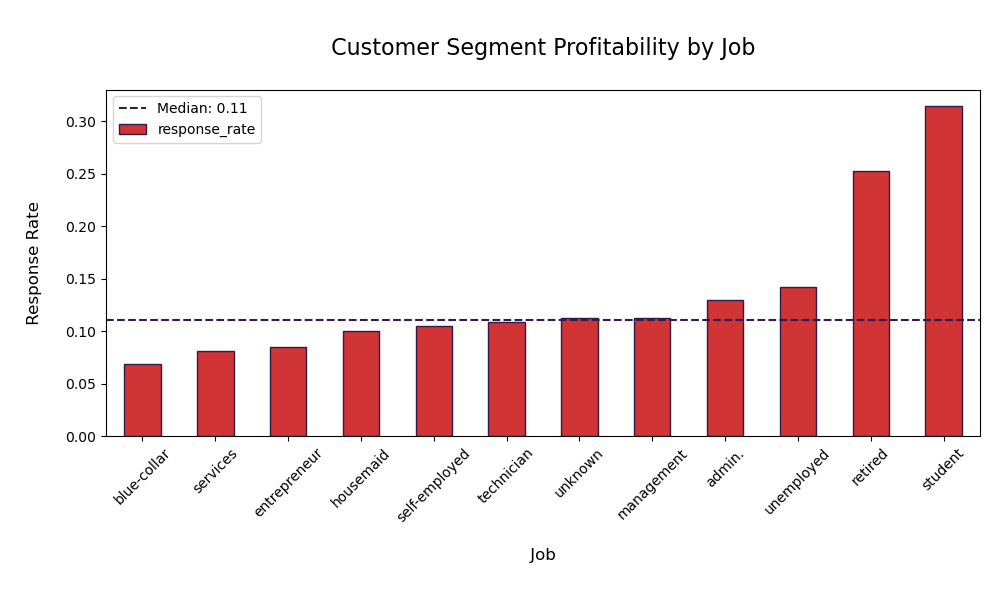

In [22]:
# Response rate by job

profitability = bank_data.groupby(['job', 'y']).size().unstack(fill_value=0)
profitability['response_rate'] = profitability['yes'] / (profitability['yes'] + profitability['no'])

# Bar plot for response rate by job

plt.figure(figsize=(10, 6))
profitability['response_rate'].sort_values().plot(kind='bar', color='#D03434', edgecolor='#331A4C')
plt.axhline(profitability['response_rate'].median(), color= '#331A4C', linestyle='--', label=f'Median: {profitability["response_rate"].median():.2f}')
plt.title('\n Customer Segment Profitability by Job \n', fontsize=16)
plt.ylabel('\n Response Rate \n', fontsize=12)
plt.xlabel(' \n Job \n', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Customer Segment Risk
**Objective**: Identify high-risk customer segments based on loan and housing status.

**Approach**: The heatmap visualizes customer segment risk by examining the relationship between `default` status, `housing`, and `loan` status. The heatmap uses shades of red to indicate the count of customers in each group, with darker shades representing higher counts. The heatmap shows that most non-defaulting customers either have no housing or personal loan, or they have a housing loan but no personal loan. In contrast, customers who defaulted are extremely rare across all loan categories, indicating a very low default rate overall.

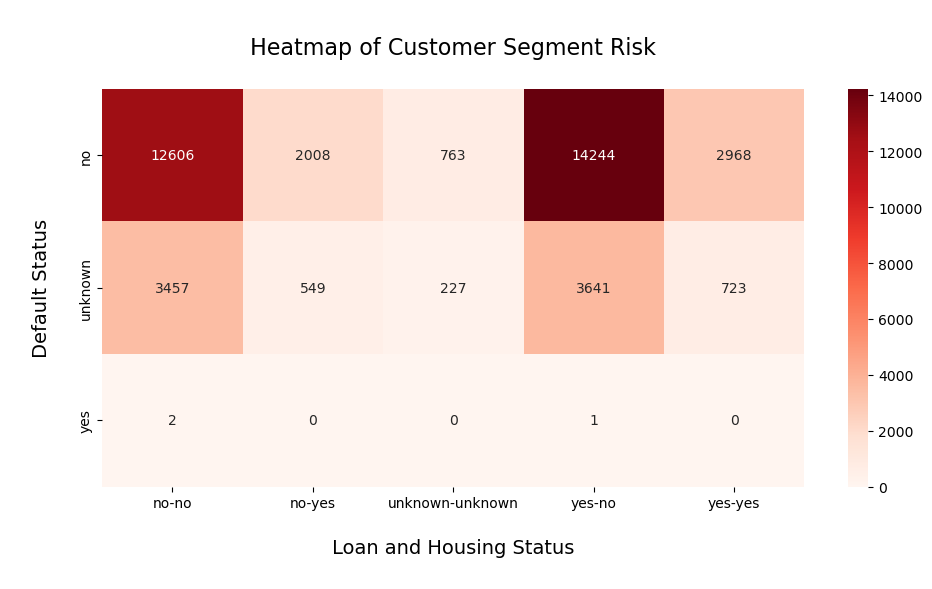

In [23]:
# Preparing the data 

risk_data = bank_data.dropna(subset=['default', 'housing', 'loan'])
risk_counts = risk_data.groupby(['default', 'housing', 'loan']).size().reset_index(name='count')

# Creating a heatmap-like structure

risk_matrix = risk_counts.pivot(index='default', columns=['housing', 'loan'], values='count').fillna(0)

# Plot the heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(risk_matrix, annot=True, fmt=".0f", cmap='Reds', cbar=True)
plt.title('\n Heatmap of Customer Segment Risk \n', fontsize=16)
plt.xlabel('\n Loan and Housing Status \n', fontsize=14)
plt.ylabel('\n Default Status \n', fontsize=14)
plt.tight_layout()
plt.show()


### Campaign Response Rate
**Objective**: Measure the effectiveness of the marketing campaign by analyzing response rates.

#### Approach
The campaign response rate was calculated and visually displayed in the two visualizations below. The majority of customers (88.7%) did not respond positively to the campaign, while only a small fraction (11.3%) did. This indicates that the campaign has a low overall success rate, suggesting potential areas for improvement in targeting or campaign strategy.

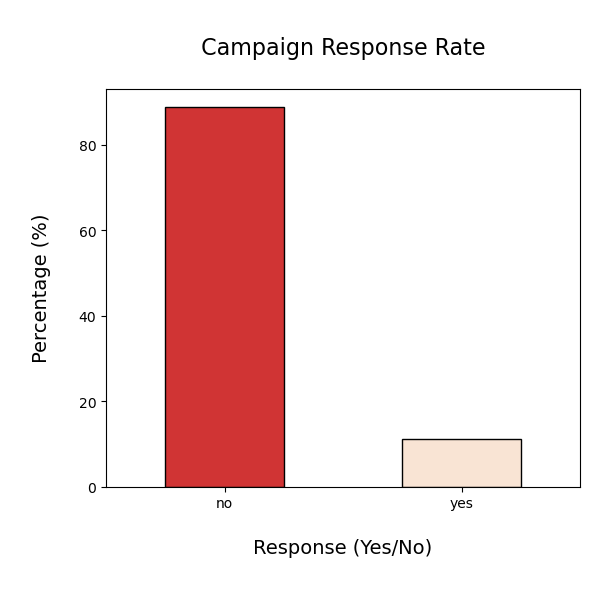

In [24]:
# Bar Chart 

# Calculate Campaign Response Rate

response_rate = bank_data['y'].value_counts(normalize=True) * 100

# Plotting the Campaign Response Rate

plt.figure(figsize=(6, 6))
response_rate.plot(kind='bar', color=['#D03434', '#F9E4D4'], edgecolor='black')
plt.title('\n Campaign Response Rate \n', fontsize=16)
plt.ylabel(' \n Percentage (%) \n', fontsize=14)
plt.xlabel(' \n Response (Yes/No) \n', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

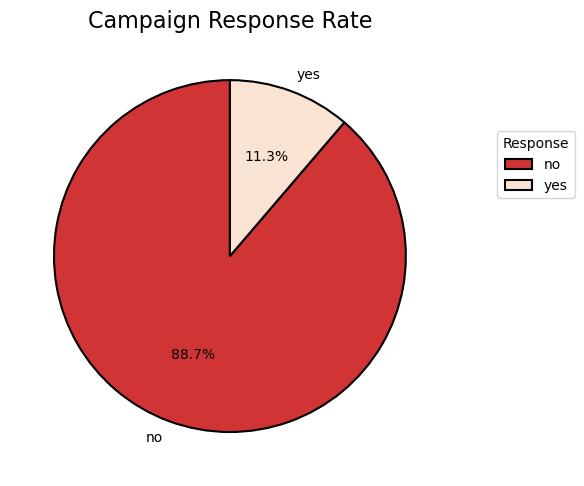

In [25]:
# Pie Chart 

# Overall Campaign Response Rate

response_rate = bank_data['y'].value_counts(normalize=True)

# Custom colors

colors = ['#D03434', '#F9E4D4']

# Pie chart for campaign response rate

plt.figure(figsize=(6, 6))
response_rate.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} 
)
plt.title('Campaign Response Rate', fontsize=16)
plt.ylabel('')

plt.legend(labels=response_rate.index, title='Response', loc='upper right', bbox_to_anchor=(1.3, 0.8))
plt.tight_layout()
plt.show()
